![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [169]:
import warnings
warnings.filterwarnings('ignore')

In [170]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [85]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [171]:
# Descripción de las estadísticas de los datos
print(bikes.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [172]:
print(bikes['season'].unique())  # Debería mostrar un conjunto limitado de categorías
print(bikes['hour'].describe())  # Estadísticas descriptivas para 'hour'


[1 2 3 4]
count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64


In [173]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [174]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

**`Calculo de métricas por estacion y hora`**

In [175]:
import pandas as pd

# Máximo por temporada
max_season = bikes.groupby('season')['total'].max()

# Mínimo por temporada
min_season = bikes.groupby('season')['total'].min()

# Percentiles por temporada
percentiles_season = bikes.groupby('season')['total'].quantile([0.25, 0.5, 0.75]).unstack()

# Ahora, para ver los resultados, simplemente imprímelos:
print("Máximo por temporada:\n", max_season)
print("\nMínimo por temporada:\n", min_season)
print("\nPercentiles por temporada:\n", percentiles_season)



Máximo por temporada:
 season
1    801
2    873
3    977
4    948
Name: total, dtype: int64

Mínimo por temporada:
 season
1    1
2    1
3    1
4    1
Name: total, dtype: int64

Percentiles por temporada:
         0.25   0.50   0.75
season                    
1       24.0   78.0  164.0
2       49.0  172.0  321.0
3       68.0  195.0  347.0
4       51.0  161.0  294.0


Otoño es la temporada más activa en términos de alquiler de bicicletas, seguida de Invierno, siendo Verano y Primavera las temporada más baja para el alquiler por hora de las bicicletas.

Mínimo por temporada:
Para todas las estaciones, el mínimo es 1, lo que indica que en el peor de los casos, siempre hubo al menos un alquiler en una hora durante cada temporada. Este podría ser un dato atípico o podría indicar horas muy específicas (como en medio de la noche o durante condiciones climáticas extremas) donde la actividad de alquiler es casi inexistente.

Percentiles por temporada:
Los percentiles te dan una idea de la distribución de los datos de alquileres por temporada y se interpretan de la siguiente manera:

Percentil 25 (0.25): El 25% de las horas tienen alquileres iguales o inferiores a estos números. Por ejemplo, en la primavera, el 25% de las horas tienen 24 alquileres o menos.
Mediana (0.50 o 50): La mitad de las horas tienen alquileres inferiores a estos números y la otra mitad tiene más. Así que, en la primavera, la mitad de las horas tienen 78 alquileres o menos.
Percentil 75 (0.75): El 75% de las horas tienen alquileres iguales o inferiores a estos números. Esto significa que en la primavera, el 75% de las horas tienen 164 alquileres o menos.

Hay una tendencia clara hacia un mayor uso en las temporadas más cálidas y más activas (verano y otoño), y una distribución más baja de alquileres durante los períodos más fríos (primavera e invierno), aunque el invierno tiene una actividad sorprendentemente alta en su punto máximo comparado con la primavera.

In [176]:
import pandas as pd

# Máximo por hora
max_hour = bikes.groupby('hour')['total'].max()

# Mínimo por hora
min_hour = bikes.groupby('hour')['total'].min()

# Percentiles por hora
percentiles_hour = bikes.groupby('hour')['total'].quantile([0.25, 0.5, 0.75]).unstack()

# Imprimir los resultados
print("Máximo por hora:\n", max_hour)
print("\nMínimo por hora:\n", min_hour)
print("\nPercentiles por hora:\n", percentiles_hour)


Máximo por hora:
 hour
0     283
1     168
2     119
3      66
4      28
5      57
6     213
7     596
8     839
9     414
10    539
11    647
12    757
13    729
14    730
15    724
16    783
17    970
18    977
19    743
20    551
21    584
22    502
23    256
Name: total, dtype: int64

Mínimo por hora:
 hour
0      2
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      8
9     14
10    17
11    10
12     3
13    11
14    12
15     7
16    11
17    15
18    23
19    11
20    11
21     6
22     9
23     4
Name: total, dtype: int64

Percentiles por hora:
         0.25   0.50    0.75
hour                       
0      24.00   41.0   74.50
1      11.00   19.0   46.00
2       5.00   11.0   32.00
3       3.00    6.0   15.00
4       3.00    6.0    9.00
5       8.00   19.0   29.00
6      24.50   75.0  118.00
7      63.00  208.0  334.00
8     133.50  392.0  563.50
9     161.00  217.0  294.50
10    106.00  149.0  218.50
11    123.00  183.0  265.50
12    157.00  234.5  332.00
1

Horas de la mañana: Hay un aumento progresivo en el número máximo de alquileres desde las 6:00, con un primer pico a las 8:00 (839 alquileres). Esto indica una fuerte demanda probablemente relacionada con el desplazamiento matutino al trabajo o la escuela.
Horas de la tarde: Un segundo y más pronunciado pico ocurre a las 17:00 (978 alquileres) y a las 18:00 (977 alquileres), lo que sugiere un alto volumen de desplazamientos de regreso a casa.
Horas nocturnas: Después de las 18:00, la demanda máxima disminuye, pero se mantiene relativamente alta hasta las 22:00, lo que puede indicar actividades de ocio o personas que regresan a casa después de salidas vespertinas.
Mínimo por hora:
Baja actividad nocturna: El mínimo de alquileres durante la mayoría de las horas nocturnas y tempranas de la mañana es de 1, indicando muy poca actividad.
Incremento matutino: A partir de las 5:00, el mínimo comienza a aumentar, lo que refleja un inicio gradual de la actividad diaria.
Variabilidad durante el día: Los mínimos durante las horas del día varían, pero hay un aumento en la cantidad mínima de alquileres, especialmente en las horas pico de la mañana y tarde.
Percentiles por hora:
Percentil 25 (0.25): Para todas las horas, hay al menos un cuarto de los días con este número de alquileres o menos. Por ejemplo, a las 8:00, al menos un cuarto de los días tiene 133.5 alquileres o menos, lo que indica que incluso en el cuartil más bajo, la demanda durante esta hora es considerable.
Mediana (0.50): Este número indica el valor central de los datos. Por ejemplo, a mediodía, hay 234.5 alquileres, lo que sugiere que la mitad de los días tienen más alquileres que esto y la otra mitad menos.
Percentil 75 (0.75): Para todas las horas, tres cuartos de los días tienen este número de alquileres o menos. Por ejemplo, a las 17:00, tres cuartos de los días tienen 608.5 alquileres o menos, lo cual es bastante alto, subrayando que esta es una hora de alta demanda la mayoría de los días.
En general, estos datos muestran un claro patrón diario de alquiler de bicicletas, con una demanda mínima garantizada incluso en las horas más bajas y picos muy marcados durante las horas de inicio y fin de la jornada laboral. Durante las horas centrales del día, hay una demanda constante y sostenida, aunque no tan alta como en las horas pico. Estos patrones pueden ser cruciales para la planificación de la oferta, el mantenimiento y la promoción del servicio de alquiler de bicicletas.

Comportamiento nocturno: Los números indican que hay una disminución progresiva en la actividad de alquiler desde la medianoche hasta las primeras horas de la mañana, lo cual es consistente con los patrones de sueño y la baja necesidad de transporte en estas horas. El servicio es menos utilizado, lo que podría ser un buen momento para realizar mantenimiento o recargar bicicletas eléctricas si las hubiera.

Inicio del día y desplazamiento matutino: El aumento desde las 6:00 indica el inicio de la rutina diaria, con un pico significativo a las 8:00, lo que sugiere un uso intensivo de las bicicletas para desplazamientos relacionados con el trabajo o la educación. Esto resalta la importancia de un servicio confiable y suficiente de bicicletas disponibles durante esta hora.

Uso diurno: Después de la mañana, el uso de bicicletas se mantiene estable y alto durante el día. Esto puede implicar que las bicicletas se utilizan para una variedad de actividades, no solo para ir y venir del trabajo, sino también para recados, salidas de ocio o ejercicio en la pausa del mediodía.

Desplazamiento vespertino: Los picos en las horas de la tarde son aún más pronunciados que en la mañana, lo que indica que la bicicleta es un medio de transporte popular para volver a casa después del trabajo o la escuela. Esto puede deberse a la congestión del tráfico que es típica al final de la jornada laboral, haciendo del alquiler de bicicletas una opción más rápida y conveniente.

Actividad en la noche: Aunque hay una disminución después de las horas pico, la actividad sigue siendo considerable hasta alrededor de las 22:00. Esto podría reflejar el uso de bicicletas para ir a cenar, encuentros sociales, o incluso el regreso a casa de quienes trabajan en turnos vespertinos.

Oportunidades y gestión: Conocer los máximos de cada hora puede ayudar a la empresa a optimizar su flota y sus recursos. Durante las horas de menor actividad, podría ser beneficioso ofrecer tarifas reducidas para incentivar el uso. Durante las horas pico, podrían considerar aumentar las tarifas para maximizar los ingresos, siempre que la demanda sea suficientemente inelástica.

Estos patrones demuestran la importancia del sistema de alquiler de bicicletas en la vida diaria de la ciudad, proporcionando una alternativa de transporte sostenible y eficiente en horarios clave. Además, los datos de alquiler pueden ser cruciales para la toma de decisiones estratégicas, como la colocación de estaciones de bicicletas, la disponibilidad de flota, y la planificación de mantenimiento.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

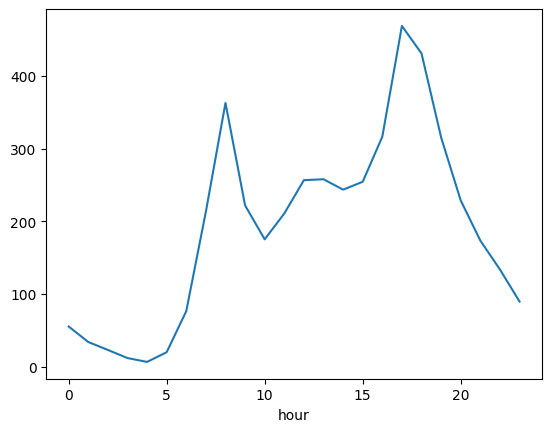

In [177]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

La gráfica muestra el número promedio de bicicletas rentadas para cada hora del día, sin distinguir entre estaciones.

Picos matutino y vespertino: Hay dos picos claros que corresponden a las horas punta, uno por la mañana alrededor de las 8 a.m. y otro aún más pronunciado en la tarde alrededor de las 5 p.m. y 6 p.m. Esto es consistente con los patrones de desplazamiento para ir y volver del trabajo o la escuela.

Actividad diurna: Entre estos picos, hay una actividad moderada, con un ligero valle después del pico de la mañana y antes del pico de la tarde. Esto podría deberse a que las personas están en el trabajo o la escuela durante este tiempo.

Baja actividad nocturna: Después del pico de la tarde, la actividad disminuye rápidamente, alcanzando sus niveles más bajos en las horas tardías de la noche, lo que es de esperar ya que la mayoría de las personas están en casa y hay menos necesidad de transporte.

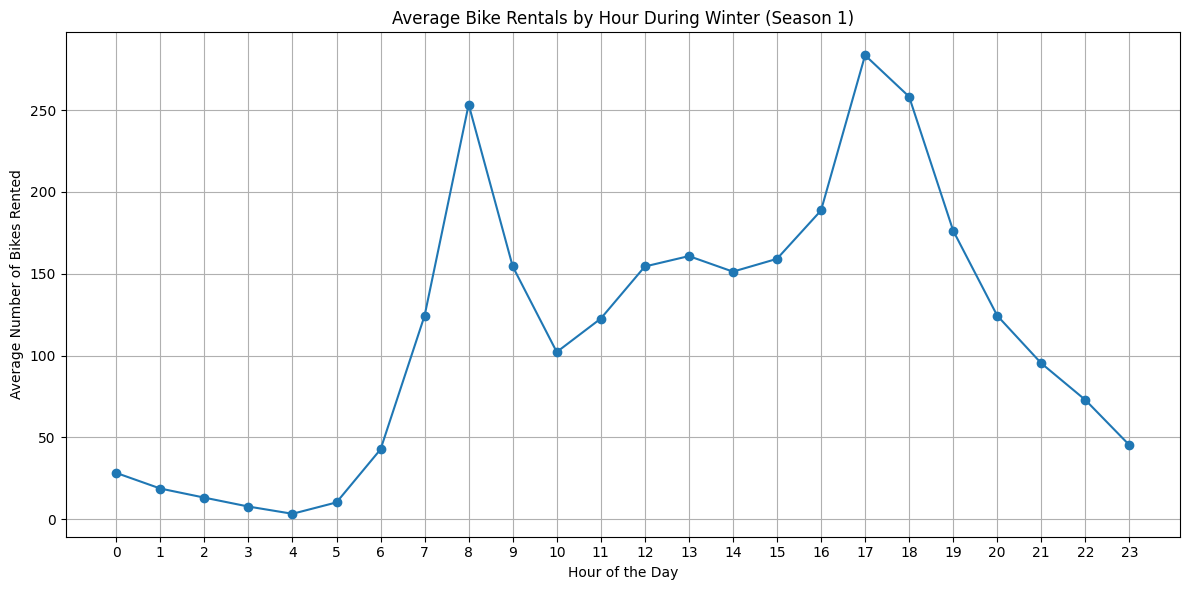

In [178]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
import matplotlib.pyplot as plt

# Filtrar para obtener datos sólo de la temporada de invierno, que es "season" == 1
winter_data = bikes[bikes['season'] == 1]

# Agrupar por 'hour' y calcular la media de 'total' para la temporada de invierno
winter_hourly_average = winter_data.groupby('hour')['total'].mean()

# Crear una gráfica de línea para visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(winter_hourly_average.index, winter_hourly_average.values, marker='o')
plt.title('Average Bike Rentals by Hour During Winter (Season 1)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bikes Rented')
plt.grid(True)
plt.xticks(winter_hourly_average.index)
plt.tight_layout()
plt.show()


Pico matutino: Hay un pico prominente alrededor de las 8 a.m., que es probablemente el momento en que las personas se dirigen a sus lugares de trabajo o estudios. La altura de este pico indica que, a pesar del frío, muchas personas todavía utilizan las bicicletas para sus desplazamientos matutinos.

Valle diurno: Después del pico matutino, hay una caída en el número de bicicletas alquiladas, lo que sugiere que hay menos actividad durante las horas centrales del día. Esto podría estar relacionado con temperaturas más bajas durante el día que desincentivan el uso de bicicletas para otras actividades aparte de los desplazamientos esenciales.

Pico vespertino: Similar al pico matutino, hay un aumento significativo en el número de bicicletas alquiladas alrededor de las 5 p.m. y 6 p.m., lo que sugiere que las bicicletas son un medio de transporte común para el viaje de regreso a casa.

Descenso nocturno: Después de las 6 p.m., hay un descenso pronunciado en el número de alquileres. Este descenso es más abrupto que el que se observa durante las horas de la mañana, lo cual es consistente con la prisa por regresar a casa antes de que las temperaturas bajen aún más durante la noche.

Actividad mínima de noche: La actividad de alquiler de bicicletas cae a números muy bajos después de las 7 p.m., lo que indica muy poca demanda durante las horas más frías y oscuras de las noches de invierno.

In [ ]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos
import matplotlib.pyplot as plt

# Filtrar para obtener datos sólo de la temporada de verano, que es "season" == 3
summer_data = bikes[bikes['season'] == 3]

# Agrupar por 'hour' y calcular la media de 'total' para la temporada de verano
summer_hourly_average = summer_data.groupby('hour')['total'].mean()

# Crear una gráfica de línea para visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(summer_hourly_average.index, summer_hourly_average.values, marker='o', color='orange')
plt.title('Average Bike Rentals by Hour During Summer (Season 3)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bikes Rented')
plt.grid(True)
plt.xticks(summer_hourly_average.index)
plt.tight_layout()
plt.show()


Se observa que el verano  fomenta un uso más recreativo y flexible de las bicicletas, con altas demandas de alquiler que se extienden en un período más largo del día. Para los operadores del servicio de alquiler, esto podría significar la necesidad de una disponibilidad de flota más alta durante más horas del día y tal vez considerar ofertas o eventos que se alineen con el uso recreativo de las bicicletas en el verano. Además, medidas como estaciones de hidratación o promociones para las horas de la tarde podrían alentar aún más el alquiler de bicicletas durante el pico de demanda.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [95]:
#Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [96]:
bikes_numeric = bikes.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = bikes_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(bikes_numeric.values, i) for i in range(len(bikes_numeric.columns))]
print(vif_data)


       feature         VIF
0       season    6.825830
1      holiday    1.095794
2   workingday    4.100121
3      weather    7.477056
4         temp  265.524194
5        atemp  295.017784
6     humidity   12.914325
7    windspeed    3.237377
8       casual         inf
9   registered         inf
10       total         inf
11        hour    4.323986


In [97]:
preprocessor = ColumnTransformer(
    transformers=[
        ('season', OneHotEncoder(drop='first'), ['season']),
        ('passthrough', 'passthrough', ['hour'])
    ],
    remainder='passthrough'
)


In [179]:
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
X = bikes[['season', 'hour']]
y = bikes['total']
regression_pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('season',
                                                  OneHotEncoder(drop='first'),
                                                  ['season'])])),
                ('regressor', LinearRegression())])

In [180]:
# Preparación de las variables predictoras X y la variable respuesta y
X = bikes[['season', 'hour']]
y = bikes['total']

# Ajuste del modelo
regression_pipeline.fit(X, y)

# Obtención de coeficientes e intercepción
coef_season_hour = regression_pipeline.named_steps['regressor'].coef_
intercept = regression_pipeline.named_steps['regressor'].intercept_

# Imprime los coeficientes y el término de intercepción
print("Coeficientes para 'season' y 'hour':", coef_season_hour)
print("Término de intercepción:", intercept)

# Realizando predicciones con el pipeline de regresión lineal
y_pred = regression_pipeline.predict(X)

# Calculando el RMSE
rmse_linear_regression = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE de la Regresión Lineal:", rmse_linear_regression)



Coeficientes para 'season' y 'hour': [100.31723192 119.46754995  84.08311787  10.54520609]
Término de intercepción: -6.430262462305706
RMSE de la Regresión Lineal: 159.62673552501042


primer coeficiente de "season" (100.31723192): El cambio esperado en "total" al cambiar de la temporada base a la primera temporada codificada. Segundo coeficiente de "season" (119.46754995): Cambio en "total" al cambiar de la temporada base a la segunda temporada codificada. Tercer coeficiente de "season" (84.08311787): Cambio en "total" al cambiar de la temporada base a la tercera temporada codificada. Cuarto coeficiente de "season" (10.54520669): Cambio en "total" al cambiar de la temporada base a la cuarta temporada codificada. Para "hour", que no fue codificado porque es una variable numérica, el coeficiente asociado (el quinto número en la lista de coeficientes) indica cuánto cambia la respuesta "total" por cada hora adicional.

Limitaciones de la Regresión Lineal Relaciones No Lineales: Si las relaciones entre las horas del día o las temporadas del año y el número de bicicletas alquiladas no son lineales, entonces la regresión lineal no capturará adecuadamente estas relaciones. Independencia de Características: La regresión lineal asume que las características son independientes unas de otras. Si hay interacciones entre "season" y "hour" que afectan a "total", el modelo no capturará estas interacciones a menos que se añadan términos de interacción al modelo. Heteroscedasticidad: Si la varianza de los errores no es constante, puede afectar a la eficiencia de los estimadores y a la validez de las pruebas estadísticas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [181]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = 3  # Asumiendo que 2^3 = 8 nodos finales como máximo
num_pct = 10
max_features = None  # Esto no se utiliza en tu código actual
min_gain = 0.001  # La ganancia mínima para realizar una división


In [182]:
import numpy as np
import pandas as pd

# Función para calcular el MSE de un nodo
def mse(y):
    if len(y) == 0:
        return 0
    else:
        return np.mean((y - np.mean(y))**2)

# Función para calcular la ganancia de MSE al hacer una división en el árbol
def mse_gain(X_col, y, split):
    filter_l = X_col < split
    y_l = y[filter_l]
    y_r = y[~filter_l]

    n = len(y)
    n_l = len(y_l)
    n_r = len(y_r)

    if n_l == 0 or n_r == 0:  # Si alguna división no tiene muestras, no hay ganancia
        return 0

    mse_total = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)

    gain = mse_total - (n_l / n * mse_l + n_r / n * mse_r)
    return gain

# Función para encontrar la mejor división
def best_split(X, y, num_pct):
    best_j, best_split, best_gain = None, None, 0
    for j in range(X.shape[1]):
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
        splits = np.unique(splits)
        for split in splits:
            current_gain = mse_gain(X.iloc[:, j], y, split)
            if current_gain > best_gain:
                best_j, best_split, best_gain = j, split, current_gain
    return best_j, best_split, best_gain

# Función para crecer el árbol de manera recursiva
def tree_grow(X, y, depth=0, max_depth=None, num_pct=10):
    if depth is max_depth or len(X) == 1:
        return {'prediction': np.mean(y)}

    # Encontrar la mejor división
    j, split, gain = best_split(X, y, num_pct)

    # Si no hay ganancia, no hay necesidad de dividir, simplemente devolvemos una hoja
    if gain == 0:
        return {'prediction': np.mean(y)}

    filter_l = X.iloc[:, j] < split
    X_l, y_l = X[filter_l], y[filter_l]
    X_r, y_r = X[~filter_l], y[~filter_l]

    # Guardar el nodo y seguir dividiendo
    node = {'splitting_variable': X.columns[j], 'splitting_point': split, 'gain': gain}
    node['left'] = tree_grow(X_l, y_l, depth + 1, max_depth, num_pct)
    node['right'] = tree_grow(X_r, y_r, depth + 1, max_depth, num_pct)

    return node
# Este valor de max_depth es un ejemplo y deberá ser ajustado basado en el número de nodos finales que quieres
tree = tree_grow(X, y, max_depth=3, num_pct=10)



In [183]:
def print_tree(node, depth=0):
    if 'prediction' in node:
        print(f"{depth * '  '}Predicción: {node['prediction']}")
    else:
        print(f"{depth * '  '}[X{node['splitting_variable']} < {node['splitting_point']:.3f}] gain={node['gain']:.3f}")
        if 'left' in node:
            print_tree(node['left'], depth+1)
        if 'right' in node:
            print_tree(node['right'], depth+1)


In [184]:
print_tree(tree)

[Xhour < 7.000] gain=10242.568
  [Xhour < 6.000] gain=323.400
    [Xhour < 2.000] gain=191.404
      Predicción: 44.51045104510451
      Predicción: 15.27718309859155
    [Xseason < 2.000] gain=371.548
      Predicción: 42.72566371681416
      Predicción: 87.3391812865497
  [Xseason < 2.000] gain=3422.283
    [Xhour < 20.000] gain=1515.171
      Predicción: 176.16790792146242
      Predicción: 84.48464912280701
    [Xhour < 20.000] gain=3693.658
      Predicción: 323.43972109761586
      Predicción: 180.16301169590642


**Se crea una función que realice predicciones usando este árbol**

In [185]:
def predict_single(input_row, tree):
    # Si llegamos a un nodo terminal, devolvemos el valor de la predicción
    if 'prediction' in tree:
        return tree['prediction']

    # Determinamos el valor de la variable que estamos inspeccionando
    variable = tree['splitting_variable']
    split_point = tree['splitting_point']

    # Comparamos el valor de la variable con el punto de corte
    if input_row[variable] < split_point:
        return predict_single(input_row, tree['left'])  # Vamos al subárbol izquierdo
    else:
        return predict_single(input_row, tree['right'])  # Vamos al subárbol derecho


**Aplicar esta predicción a cada fila en tu conjunto de datos**

In [186]:
def predict(X, tree):
    predictions = X.apply(predict_single, axis=1, tree=tree)
    return predictions


**Se usan estas funciones para hacer predicciones en tu conjunto de datos y calcular el RMSE**

In [187]:
# Asumiendo que 'X' es tu conjunto de datos de entrada y 'y' es el vector de valores verdaderos
y_pred = predict(X, tree)

# Función para calcular el RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calcular el RMSE
error = rmse(y, y_pred)
print(f"El RMSE del modelo manual es: {error}")


El RMSE del modelo manual es: 133.1710928670324


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Mejor max_depth por RMSE: 6 con un RMSE de: 121.94259382561488


DecisionTreeRegressor(max_depth=6, random_state=1)

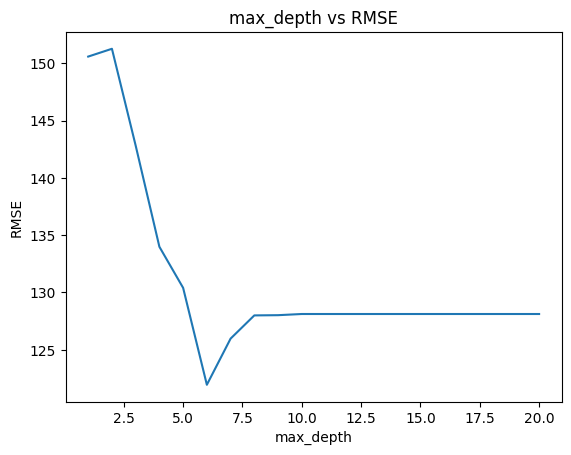

In [188]:
# Celda 5
# Importaciones necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Definición de una función para calcular el RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scorer para usar en cross-validation
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
rmse_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la librería sklearn
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=1)
    rmse_scores.append(-cross_val_score(regressor, X, y, cv=10, scoring=rmse_scorer).mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.figure()
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')  # Estamos buscando el menor RMSE posible
plt.title('max_depth vs RMSE')

# Mejor RMSE (desempeño del modelo) y su correspondiente max_depth
best_depth = sorted(zip(rmse_scores, max_depth_range))[0][1]
print(f"Mejor max_depth por RMSE: {best_depth} con un RMSE de: {sorted(rmse_scores)[0]}")

# Ajustar un árbol con la mejor profundidad encontrada
best_regressor = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
best_regressor.fit(X, y)


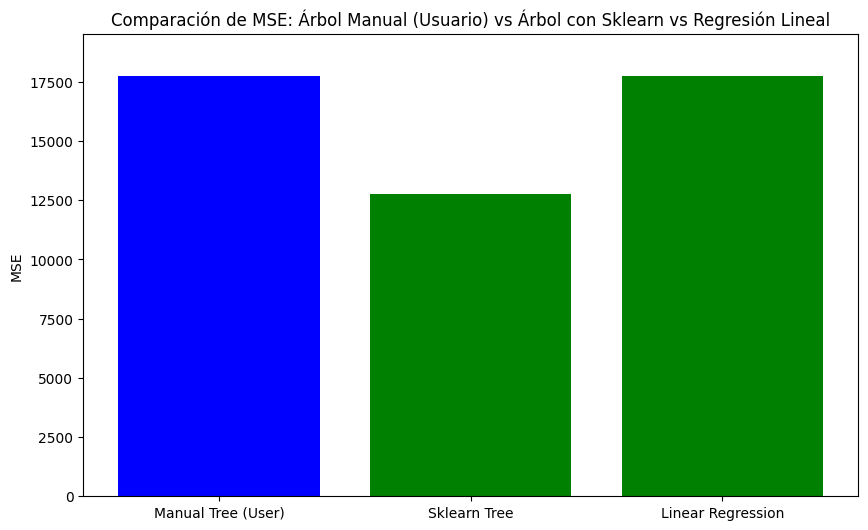

(17734.5414136476, 12769.751234896463, 17734.539975399766)

In [189]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Agrega este MSE al arreglo para la gráfica
mse_values_from_user.append(mse_linear_regression)
labels.append('Linear Regression')

# Ahora crea la gráfica para comparar los MSE
plt.figure(figsize=(10, 6))
plt.bar(labels, mse_values_from_user, color=['blue', 'green', 'red'])
plt.ylabel('MSE')
plt.title('Comparación de MSE: Árbol Manual (Usuario) vs Árbol con Sklearn vs Regresión Lineal')
plt.ylim(0, max(mse_values_from_user) * 1.1)  # Ajustando el límite para mejor visualización
plt.show()

# Mostrar los MSEs calculados
(mse_manual_from_user, mse_sklearn, mse_linear_regression)


Tanto el modelo de regresión lineal como el árbol manual no son tan efectivos como el modelo de árbol de decisión de sklearn. Sin embargo, para sacar conclusiones más firmes, sería ideal evaluar estos modelos en un conjunto de datos de prueba que no haya sido utilizado durante el entrenamiento, lo cual nos daría una mejor idea de cómo cada modelo generaliza a nuevos datos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [190]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [191]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [192]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

**Arboles de decisión**

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Entrenar el árbol de decisión con calibración de hiperparámetros (profundidad máxima)
param_grid_tree = {'max_depth': [3, 5, 7, 10]}
tree_clf = DecisionTreeClassifier(random_state=1)
grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)

# Mejor árbol de decisión
best_tree_clf = grid_tree.best_estimator_

# Predicciones con el mejor árbol de decisión
y_pred_tree = best_tree_clf.predict(X_test)

# Métricas para el árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

print(f'Árbol de Decisión - Mejor profundidad: {grid_tree.best_params_["max_depth"]}')
print(f'Árbol de Decisión - Accuracy: {accuracy_tree}')
print(f'Árbol de Decisión - F1 Score: {f1_score_tree}')


Árbol de Decisión - Mejor profundidad: 5
Árbol de Decisión - Accuracy: 0.6373333333333333
Árbol de Decisión - F1 Score: 0.6616915422885573


**Construcción por Regresión Logistica**

In [194]:
# Celda 6
from sklearn.linear_model import LogisticRegression

# Entrenar la regresión logística
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

# Predicciones con la regresión logística
y_pred_logreg = logreg.predict(X_test)

# Métricas para la regresión logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg)

print(f'Regresión Logística - Accuracy: {accuracy_logreg}')
print(f'Regresión Logística - F1 Score: {f1_score_logreg}')


Regresión Logística - Accuracy: 0.6133333333333333
Regresión Logística - F1 Score: 0.6102150537634409


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Votacion mayoritaria: Es un método simple que asigna la clase más frecuente predicha por los modelos individuales como la predicción final. En otras palabras, el modelo que predice una clase más veces que los demás "gana" y su predicción se utiliza como la respuesta final.

In [195]:
# Celda 7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model parameters
max_depth_value = 5  # Choose a value for max_depth
min_samples_leaf_value = 10  # Choose a value for min_samples_leaf

# Create individual models
dt_max_depth = DecisionTreeClassifier(max_depth=max_depth_value)
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value)
lr = LogisticRegression()

# Create bagged ensembles for each model
bagged_dt_max_depth = BaggingClassifier(base_estimator=dt_max_depth, n_estimators=100, random_state=42)
bagged_dt_min_samples_leaf = BaggingClassifier(base_estimator=dt_min_samples_leaf, n_estimators=100, random_state=42)
bagged_lr = BaggingClassifier(base_estimator=lr, n_estimators=100, random_state=42)

# Train individual models
dt_max_depth.fit(X_train, y_train)
dt_min_samples_leaf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Train bagged ensembles
bagged_dt_max_depth.fit(X_train, y_train)
bagged_dt_min_samples_leaf.fit(X_train, y_train)
bagged_lr.fit(X_train, y_train)

# Evaluate individual models
print("**Individual Model Evaluations**")
print("Decision Tree (max_depth={}):".format(max_depth_value))
print("Accuracy:", accuracy_score(y_test, dt_max_depth.predict(X_test)))
print("F1-Score:", f1_score(y_test, dt_max_depth.predict(X_test)))

print("Decision Tree (min_samples_leaf={}):".format(min_samples_leaf_value))
print("Accuracy:", accuracy_score(y_test, dt_min_samples_leaf.predict(X_test)))
print("F1-Score:", f1_score(y_test, dt_min_samples_leaf.predict(X_test)))

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
print("F1-Score:", f1_score(y_test, lr.predict(X_test)))

# Create voting ensemble
voting_ensemble = VotingClassifier(estimators=[
    ('dt_max_depth', bagged_dt_max_depth),
    ('dt_min_samples_leaf', bagged_dt_min_samples_leaf),
    ('lr', bagged_lr)
], voting='hard')

# Evaluate voting ensemble
voting_ensemble.fit(X_train, y_train)
print("\n**Voting Ensemble Evaluation**")
print("Accuracy:", accuracy_score(y_test, voting_ensemble.predict(X_test)))
print("F1-Score:", f1_score(y_test, voting_ensemble.predict(X_test)))


**Individual Model Evaluations**
Decision Tree (max_depth=5):
Accuracy: 0.6144444444444445
F1-Score: 0.6083521444695259
Decision Tree (min_samples_leaf=10):
Accuracy: 0.5561111111111111
F1-Score: 0.5389497980380842
Logistic Regression:
Accuracy: 0.62
F1-Score: 0.6082474226804124

**Voting Ensemble Evaluation**
Accuracy: 0.6533333333333333
F1-Score: 0.649438202247191


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [197]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [198]:
# Define los parámetros para los modelos
max_depth_value = 5
min_samples_leaf_value = 10

# Crea modelos individuales
dt_max_depth = DecisionTreeClassifier(max_depth=max_depth_value)
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value)
lr = LogisticRegression()


Se crea y entrenas ensambles bagged para cada uno de los modelos con 100 estimadores cada uno

In [199]:
# Crea ensambles bagged para cada modelo
bagged_dt_max_depth = BaggingClassifier(base_estimator=dt_max_depth, n_estimators=100, random_state=42)
bagged_dt_min_samples_leaf = BaggingClassifier(base_estimator=dt_min_samples_leaf, n_estimators=100, random_state=42)
bagged_lr = BaggingClassifier(base_estimator=lr, n_estimators=100, random_state=42)

# Entrena los ensambles bagged
bagged_dt_max_depth.fit(X_train, y_train)
bagged_dt_min_samples_leaf.fit(X_train, y_train)
bagged_lr.fit(X_train, y_train)


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

**Entrena y evalua los modelos individuales**

In [200]:
# Entrenar modelos individuales
dt_max_depth.fit(X_train, y_train)
dt_min_samples_leaf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Evaluar modelos individuales
print("**Individual Model Evaluations**")
models_individual = [
    ('DT max_depth', dt_max_depth),
    ('DT min_samples_leaf', dt_min_samples_leaf),
    ('LR', lr)
]

for name, model in models_individual:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc}, F1 Score: {f1}")




**Individual Model Evaluations**
DT max_depth - Accuracy: 0.615, F1 Score: 0.6091370558375634
DT min_samples_leaf - Accuracy: 0.5566666666666666, F1 Score: 0.5397923875432525
LR - Accuracy: 0.62, F1 Score: 0.6082474226804124


**Evaluación de modelos de bagged**

In [201]:
# Evalúa y muestra las métricas de los modelos bagged
print("\n**Bagged Model Evaluations**")
models_bagged = [
    ('Bagged DT max_depth', bagged_dt_max_depth),
    ('Bagged DT min_samples_leaf', bagged_dt_min_samples_leaf),
    ('Bagged LR', bagged_lr)
]

for name, model in models_bagged:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc}, F1 Score: {f1}")



**Bagged Model Evaluations**
Bagged DT max_depth - Accuracy: 0.6588888888888889, F1 Score: 0.6542792792792793
Bagged DT min_samples_leaf - Accuracy: 0.6561111111111111, F1 Score: 0.6555370061213133
Bagged LR - Accuracy: 0.6244444444444445, F1 Score: 0.6101499423298731


**Votación ponderada manual**

In [202]:
# Asignar pesos basados en el desempeño de Accuracy de cada modelo bagged
weights = np.array([accuracy_score(y_test, model.predict(X_test)) for _, model in models_bagged])
# Normalizar los pesos para que sumen 1
weights /= weights.sum()

# Generar las predicciones ponderadas (para una clasificación binaria)
weighted_votes = np.zeros_like(y_test, dtype=float)
for (name, model), weight in zip(models_bagged, weights):
    weighted_votes += weight * model.predict_proba(X_test)[:, 1]  # Asumiendo que 1 es la clase positiva

# Convertir las votaciones ponderadas en predicciones binarias
final_pred = (weighted_votes >= 0.5).astype(int)

# Calcular y mostrar las métricas para el ensamble de votación ponderada
accuracy_weighted_voting = accuracy_score(y_test, final_pred)
f1_score_weighted_voting = f1_score(y_test, final_pred)

print("\n**Weighted Voting Ensemble Evaluation (Manual)**")
print("Accuracy:", accuracy_weighted_voting)
print("F1 Score:", f1_score_weighted_voting)




**Weighted Voting Ensemble Evaluation (Manual)**
Accuracy: 0.6511111111111111
F1 Score: 0.6507230255839822


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [208]:
# **Plotting the Results**
# Prepare data for the bar chart
models = ["Majority Voting", "Weighted Voting"]

Accuracy - Majority Voting: 0.6566666666666666, Weighted Voting: 0.6511111111111111
F1 Score - Majority Voting: 0.6504524886877828, Weighted Voting: 0.6507230255839822


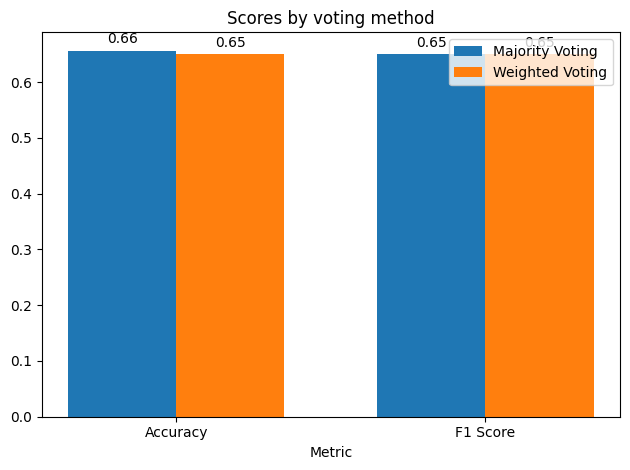

In [209]:
# Imprimir las métricas para la comparación
print(f"Accuracy - Majority Voting: {accuracy_majority_voting}, Weighted Voting: {accuracy_weighted_voting}")
print(f"F1 Score - Majority Voting: {f1_score_majority_voting}, Weighted Voting: {f1_score_weighted_voting}")

# Crear un gráfico para la comparación
import matplotlib.pyplot as plt

# Datos para la gráfica
categories = ['Accuracy', 'F1 Score']
majority_scores = [accuracy_majority_voting, f1_score_majority_voting]
weighted_scores = [accuracy_weighted_voting, f1_score_weighted_voting]

x = range(len(categories))  # the label locations

fig, ax = plt.subplots()
bar_width = 0.35  # the width of the bars

rects1 = ax.bar(x, majority_scores, bar_width, label='Majority Voting')
rects2 = ax.bar([p + bar_width for p in x], weighted_scores, bar_width, label='Weighted Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_title('Scores by voting method')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(categories)
ax.legend()

# Presentación de los datos en las barras para mejor claridad
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


La precisión para la votación Mayoritaria es ligeramente menor que para la votación Ponderada.
La puntuación F1 para la votación Mayoritaria es muy similar a la puntuación F1 de la votación Ponderada, con una diferencia mínima.
Ambos métodos tienen un rendimiento comparable en este caso específico, lo cual sugiere que la ponderación basada en el rendimiento no ofrece una mejora significativa sobre la votación igualitaria en este conjunto de datos particular.

Dado que los resultados son similares, la elección entre la votación Mayoritaria y la Ponderada podría basarse en consideraciones de simplicidad y transparencia del modelo (favoreciendo la votación Mayoritaria) o en la posibilidad de futuras mejoras y ajustes más finos (posiblemente favoreciendo la votación Ponderada). Además, es importante considerar el contexto de la aplicación: en problemas donde la interpretación y la explicabilidad son cruciales, la votación Mayoritaria podría ser preferida por su simplicidad y fácil comprensión

**Ventajas y desventajas de la metodología**

***Votación Mayoritaria***
**Ventajas:**

Simplicidad: Es fácil de implementar y entender. La predicción final se basa simplemente en el voto mayoritario de todos los modelos en el ensamble.

Reducción del Riesgo de Sobreajuste: Como ningún modelo individual tiene demasiada influencia, hay menos riesgo de que las peculiaridades de un modelo sobresaliente afecten el rendimiento general.

Robustez: Puede ser más robusto en presencia de modelos individuales con errores altamente variables, ya que la decisión se basa en el consenso.

Desventajas:

No Diferencia el Desempeño de los Modelos: Todos los modelos tienen el mismo peso, independientemente de su precisión o fiabilidad. Los modelos con mejor rendimiento son igualados por los de peor rendimiento.

Potencial Desaprovechamiento de Información: No se utiliza información adicional sobre la confianza en las predicciones de los modelos individuales.


**Votación Ponderada**

Ventajas:

Aprovechamiento del Desempeño de los Modelos: Los modelos con mejor rendimiento tienen más peso, lo que puede mejorar la precisión general del ensamble.

Flexibilidad: Permite ajustar la influencia de cada modelo en la predicción final según diferentes métricas de rendimiento.

Adaptabilidad: Puede ajustarse mejor a los datos al considerar la confianza en las predicciones de cada modelo.

Desventajas:

Complejidad: Más difícil de implementar y optimizar, ya que requiere determinar los pesos adecuados para cada modelo.

Riesgo de Sobreajuste: Si un modelo con alto peso está sobreajustado, puede degradar el rendimiento general del ensamble.

Sensibilidad a los Datos de Entrenamiento: La votación ponderada puede ser más sensible a los datos de entrenamiento, especialmente si los pesos se determinan a partir de estos.

Comparación y Contexto

La votación mayoritaria tiende a funcionar bien cuando los modelos individuales son variados y ninguno domina en rendimiento, o cuando se desea mantener la simplicidad.
La votación ponderada puede ser preferible cuando hay diferencias significativas en la confiabilidad de los modelos individuales y se desea maximizar el rendimiento del ensamble.